This example follows the one from https://github.com/eabarnes1010/ats655-coursematerial/blob/master/jupyter_notebooks/central_limit_theorem.ipynb 

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Basic Gaussian example

As we have discussed, the Central Limit Theorem tells us that no matter the underlying distribution of your data, if you take a large enough sample of your data, and compute its average, then take another sample and take its average, then another, etc., the distribution of these sample means will be normal with mean equal to the mean of the random variable and standard deviation of $\sigma/\sqrt{N}$, where $\sigma$ is the standard deviation of the underlying distribution of the random variable.


To show this, we will start with a simple example of three random variables all drawn from a standard normal. One has sample length $N=5$, another $N=25$ and the third $N=100$. What we will do is draw 10,000 samples of each of these distributions, take the means of the samples, and then plot the frequency that each mean appears.

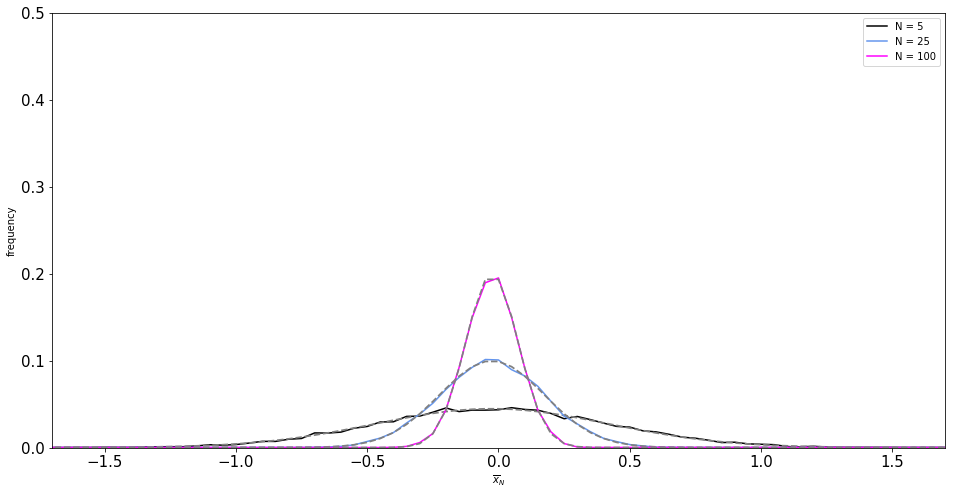

In [70]:
f, ax = plt.subplots(1, 1, figsize=(16,8))
bin_width = 0.05
for N in (5, 25, 100):

    y2 = []
    
    if(N == 5):
        clr = 'black'
    elif(N==25):
        clr = 'cornflowerblue'
    elif(N==100):
        clr = 'magenta'
        
    
    for i in np.arange(0,10000): # repeat 10,000 times
    
        y2.append(np.mean(np.random.normal(loc = 0, scale = 1., size = N)))        
    
    # calc histograms
    bins = np.arange(-8,8.1,bin_width)
    y2hist, x = np.histogram(y2,bins = bins)
    
    x = bins[0:-1]
    ax.plot(x,y2hist/(float(len(y2))), color = clr, label = 'N = ' + str(N))
    ax.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = 0, scale = 1./np.sqrt(N)), 
             color = 'gray', linestyle = '--', linewidth = 1.75)
    
ax.legend()
ax.set_xticks(np.arange(-10,10,2))
ax.set_xticks(np.arange(-2,2,.5))
ax.set_xlim(-1.7,1.7)
ax.set_ylim(0,.5)

ax.set_xlabel(r'$\overline{x}_N$')
ax.set_ylabel('frequency')
ax.tick_params(labelsize=15)
plt.show()

In the figure above, the colors show the different frequency distributions of the means of the actual samples, and the dashed gray curves show you what theory would suggest. As you can see, the theory looks pretty good - even for $N = 5$!

# Non-Gaussian examples
Perhaps you are unimpressed with the above example since we started with Gaussians to begin with! The strength of the **Central Limit Theorem** is really that the means of random variables from any distribution will converge to a normal distribution assuming the sample size (i.e. $N$) is large enough. Let's see how this works (and what "large enough" means).

Let's first introduce our three distributions from which we will draw our samples. Namely, a lognormal, uniform and normal distribution.

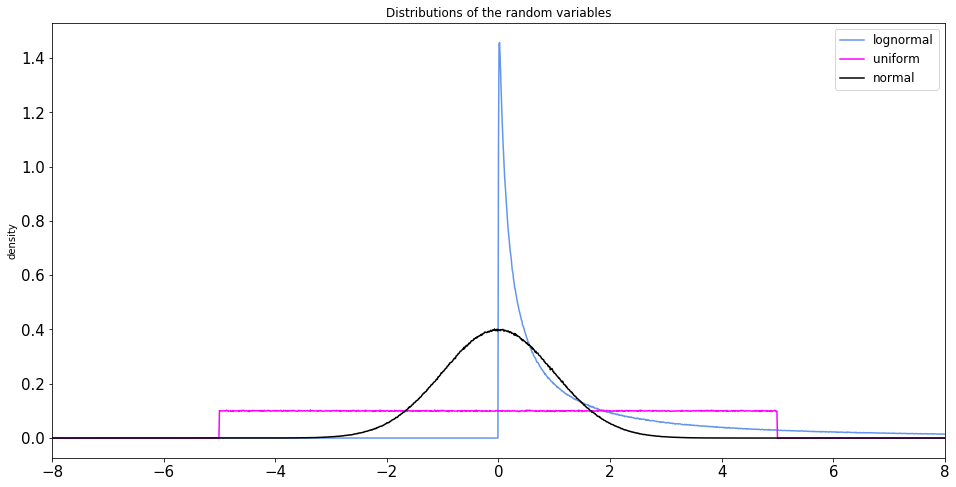

In [71]:
N0 = 10000000
xinc = 0.01
xbins = np.arange(-10,10+xinc,xinc)

Rlog = np.random.lognormal(0.,2.,size=(N0,))
Runi = np.random.uniform(-5.,5.,size=(N0,))
Rnorm = np.random.normal(0,1,size = (N0,))

f, ax = plt.subplots(1, 1, figsize=(16,8))
hx = np.histogram(Rlog,xbins)
ax.plot(hx[1][:-1],hx[0]/(float(N0)*xinc),'-',color='cornflowerblue', label='lognormal')

hx = np.histogram(Runi,xbins)
ax.plot(hx[1][:-1],hx[0]/(float(N0)*xinc),'-',color='magenta',label = 'uniform')

hx = np.histogram(Rnorm,xbins)
ax.plot(hx[1][:-1],hx[0]/(float(N0)*xinc),'-',color='black', label = 'normal')

ax.legend(prop={'size': 12})
ax.set_ylabel('density')
ax.set_xlim(-8,8)
ax.set_title('Distributions of the random variables')
ax.tick_params(labelsize=15)
plt.show()

Now, we can draw samples of various lengths (which we once again call $N$) from each of these distributions, take the means of these samples, and plot the distributions of the means. The Central Limit Theorem tells us that as $N$ gets bigger all of the distributions of means will start looking like Gaussians - even if the underlying distributions from which we draw the samples are not Gaussian! Let's try it out.

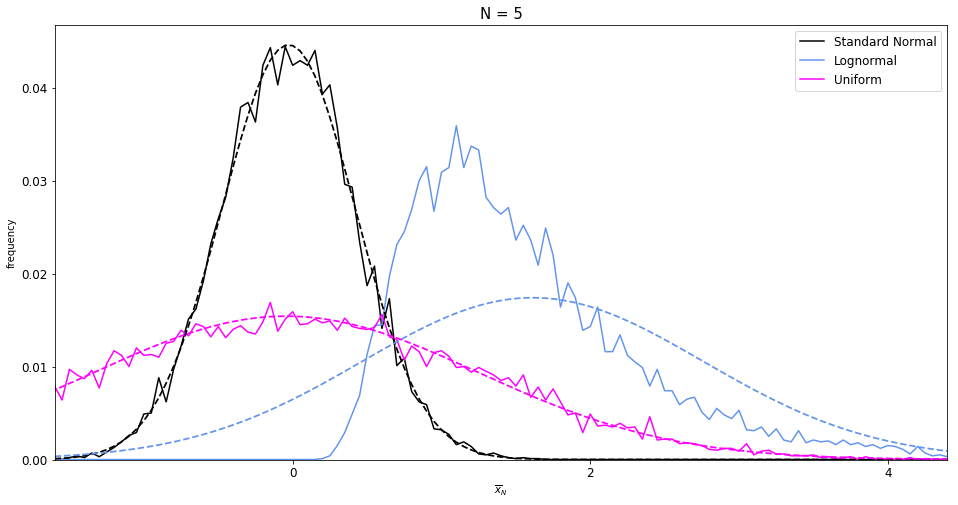

In [72]:
f, ax = plt.subplots(1,1, figsize=(16, 8))

# N in [5, 25, 100, 200, 1000]
N = 5

y1, y2, y3 = [], [], []

for i in np.arange(0,10000):

    y1.append(np.mean(np.random.normal(loc = 0, scale = 1., size = N)))    
    y2.append(np.mean(np.random.lognormal(mean = 0, sigma = 1, size = N)))
    y3.append(np.mean(np.random.uniform(low = -5, high = 5, size = N)))


sigma_y1 = np.std(np.random.chisquare(3., size = N))
sigma_y2 = np.std(np.random.lognormal(mean = 0, sigma = 1, size = N))
sigma_y3 = np.std(np.random.uniform(low = -5, high = 5, size = N))

# calc histograms
bins = np.arange(-8,8+bin_width,bin_width)
y1hist, x = np.histogram(y1,bins = bins)
y2hist, x = np.histogram(y2,bins = bins)
y3hist, x = np.histogram(y3,bins = bins)

x = bins[0:-1]

ax.plot(x,y1hist/(float(len(y1))), color = 'black', label = 'Standard Normal')
ax.plot(x,y2hist/(float(len(y2))),  color = 'cornflowerblue', label = 'Lognormal')
ax.plot(x,y3hist/(float(len(y3))), color = 'magenta', label = 'Uniform')

if(N>=0):
    ax.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y1), scale = 1./np.sqrt(N)), 
             color = 'black', linestyle = '--', linewidth = 1.75)
    ax.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y2), scale = sigma_y3/np.sqrt(N)), 
             color = 'cornflowerblue', linestyle = '--', linewidth = 1.75)
    ax.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y3), scale = sigma_y4/np.sqrt(N)), 
             color = 'magenta', linestyle = '--', linewidth = 1.75)    

ax.set_xticks(np.arange(-10,10,2))
ax.set_xlim(-1.6,4.4)
ymin, ymax = ax.get_ylim()
ax.set_ylim(0,ymax)

textprint = r'$\overline{x}_{N}$'
ax.set_xlabel(textprint)
ax.set_ylabel('frequency')
ax.set_title('N = ' + str(N), size=15)
ax.tick_params(labelsize=12)
ax.legend(prop={'size': 12})


As you can see, the theoretical prediction (the dashed lines) converge to the actual distributions (solid lines) as $N$ increases. For really small $N$, only the normal random variable looks even close to its theoretical prediction (again - we actually need the $t$-statistic here, but the prediction is still okay). Thus, as the Central Limit Theorem states, convergence requires $N$ to be big enough, and the definition of big enough depends on the underlying distribution of the random variable. It is up to you to figure out how big big enough is for your data.